<a href="https://colab.research.google.com/github/Say1ddd/mpp_colab/blob/main/mpp_22Feb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# @title Importing the Datasets
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [53]:
# @title Importing the Libraries
import pandas as pd

In [54]:
# @title Loading the Datasets
df = pd.read_csv("/content/drive/MyDrive/stock_data.csv",
                 parse_dates=True,
                 index_col="YEAR")

df.head()

,REGION,SALARY
YEAR,,
1997-01-01,ACEH,128000
1997-01-01,SUMATERA UTARA,151000
1997-01-01,SUMATERA BARAT,119000
1997-01-01,RIAU,151500
1997-01-01,JAMBI,119500


In [55]:
# @title Importing the Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [56]:
# @title Deleting Column
df.drop(columns='REGION', inplace =True)
df.head()

,SALARY
YEAR,
1997-01-01,128000
1997-01-01,151000
1997-01-01,119000
1997-01-01,151500
1997-01-01,119500


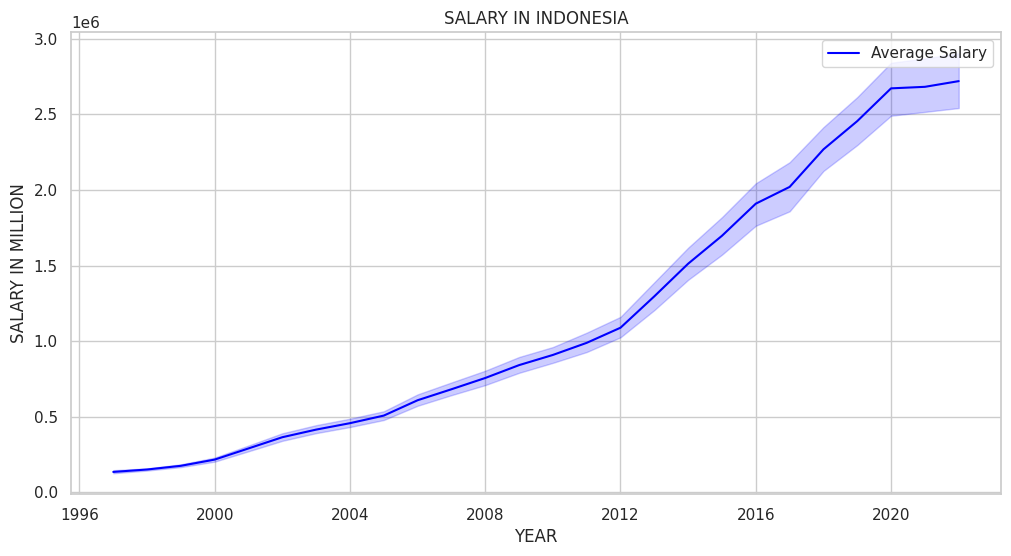

In [57]:
# @title Assuming df is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='YEAR', y='SALARY', label='Average Salary', color='blue')

plt.xlabel('YEAR')
plt.ylabel('SALARY IN MILLION')
plt.title('SALARY IN INDONESIA')

plt.show()

In [58]:
# @title Detecting Stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['SALARY'])
print('Salary Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

Salary Statistic: 0.20371477884906733
p-value: 0.9724691766078132
Critical Values: {'1%': -3.4380849118778234, '5%': -2.86495432618506, '10%': -2.5685880571933963}


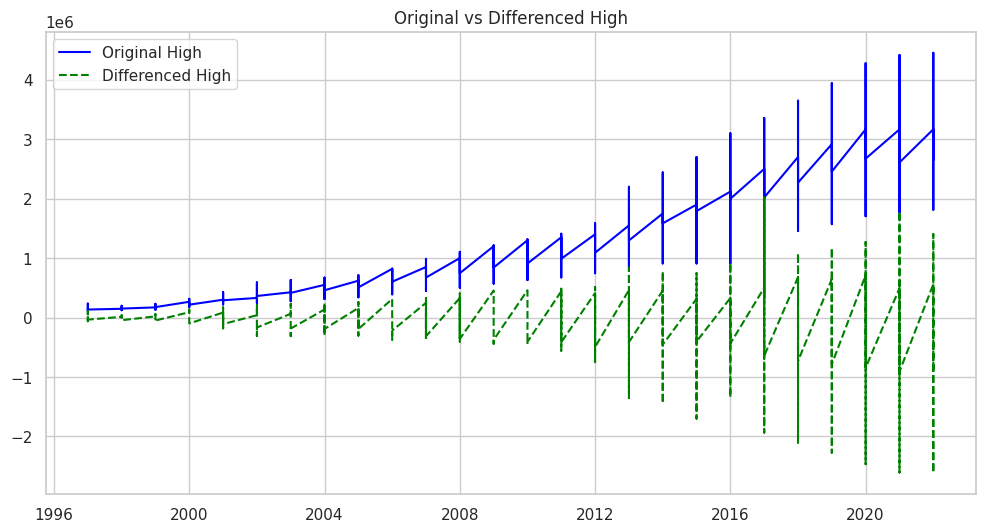

In [59]:
# @title Smoothening the data using Differencing and Moving Average
# Differencing
df['SALARY1'] = df['SALARY'].diff()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['SALARY'], label='Original High', color='blue')
plt.plot(df['SALARY1'], label='Differenced High', linestyle='--', color='green')
plt.legend()
plt.title('Original vs Differenced High')
plt.show()

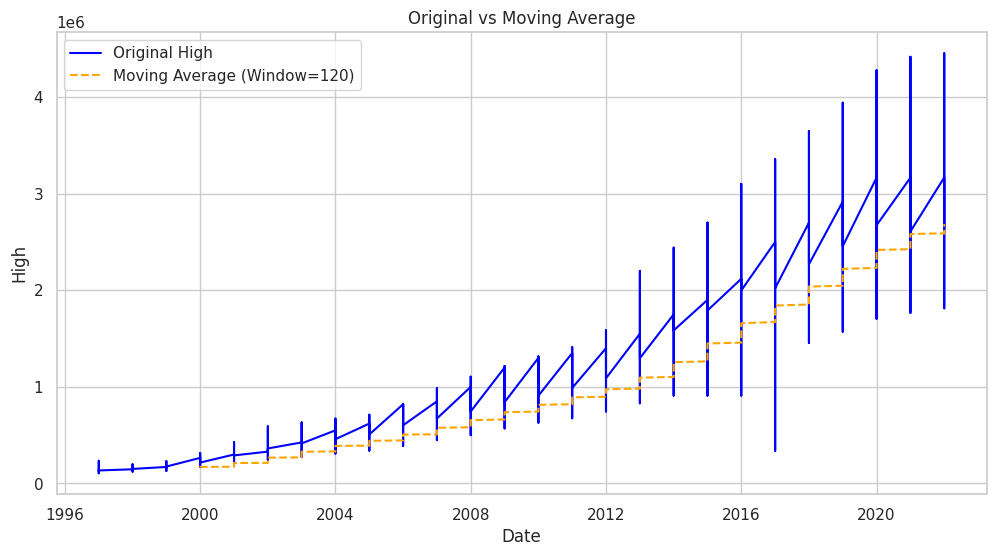

In [60]:
# Moving Average
window_size = 120
df['high_smoothed'] = df['SALARY'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(df['SALARY'], label='Original High', color='blue')
plt.plot(df['high_smoothed'], label=f'Moving Average (Window={window_size})', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving Average')
plt.legend()
plt.show()

In [61]:
# @title Original Data Vs Differenced Data
# Create a DataFrame with 'high' and 'high_diff' columns side by side
df_combined = pd.concat([df['SALARY'], df['SALARY1']], axis=1)

# Display the combined DataFrame
print(df_combined.head())


            SALARY  SALARY1
YEAR                       
1997-01-01  128000      NaN
1997-01-01  151000  23000.0
1997-01-01  119000 -32000.0
1997-01-01  151500  32500.0
1997-01-01  119500 -32000.0


In [62]:
# Remove rows with missing values
df.dropna(subset=['SALARY1'], inplace=True)
df['SALARY1'].head()

YEAR
1997-01-01    23000.0
1997-01-01   -32000.0
1997-01-01    32500.0
1997-01-01   -32000.0
1997-01-01     8000.0
Name: SALARY1, dtype: float64

In [63]:
from statsmodels.tsa.stattools import adfuller

# Assuming df is your DataFrame
result = adfuller(df['SALARY1'])
print('Salary Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

Salary Statistic: -11.841214751018262
p-value: 7.581807388804364e-22
Critical Values: {'1%': -3.438094071905401, '5%': -2.8649583643817227, '10%': -2.568590208277287}
